In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.linear_model import LinearRegression as linreg

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("tips.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
data['price_per_person'] = round((data['total_bill'])/(data['size']),2)

In [38]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [39]:
#Dividing the tip by using the size to find the approximate total tip

In [64]:
train_val,test = train_test_split(data,train_size=0.8,random_state=1349)
train, validate = train_test_split(train_val,train_size = 0.7,random_state=1349)
train.shape,validate.shape,test.shape

((136, 9), (59, 9), (49, 9))

In [65]:
X_train,y_train = train.drop(columns='tip'),train[['tip']]

In [69]:
X_train['total_bill'].dtype in ('int64','float64')

True

In [71]:
X_train['time'].dtype != 'object'

False

In [77]:
num_cols,cat_cols = [],[]

for i in X_train.columns:
    if np.issubdtype(X_train[i],np.number):
        if X_train[i].value_counts().shape[0]>5:
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        cat_cols.append(i)

In [78]:
num_cols

['total_bill', 'price_per_person', 'tips_per_person']

In [79]:
cat_cols

['sex', 'smoker', 'day', 'time', 'size']

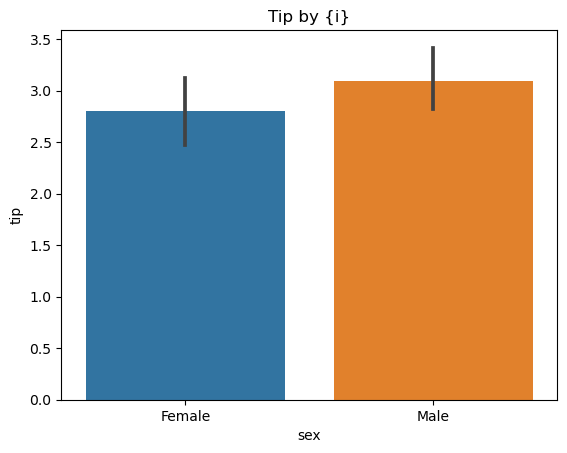

~~~~~~~~~~~~~


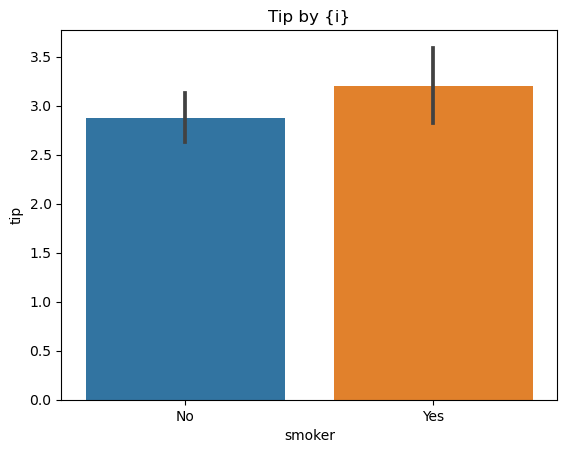

~~~~~~~~~~~~~


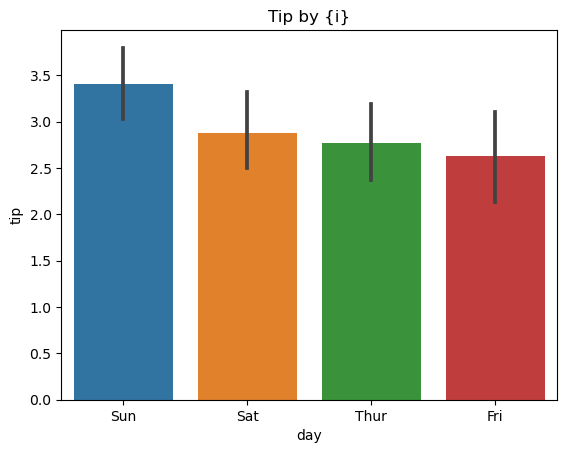

~~~~~~~~~~~~~


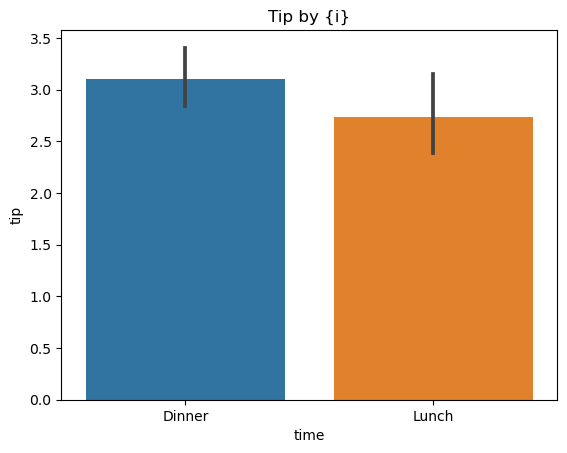

~~~~~~~~~~~~~


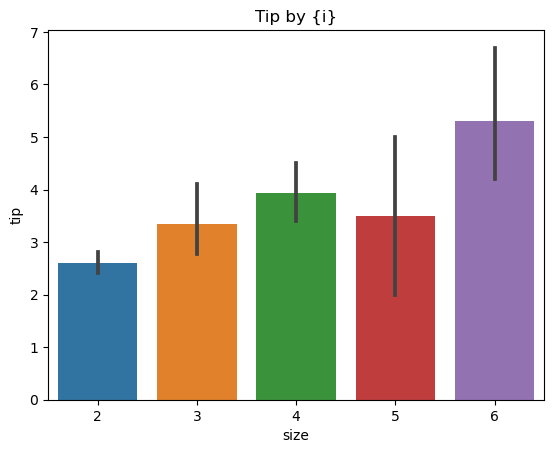

~~~~~~~~~~~~~


In [81]:
for i in cat_cols:
    sns.barplot(data=train,x=i,y='tip')
    plt.title("Tip by {i}")
    plt.show()
    print('~~~~~~~~~~~~~')

In [82]:
from scipy.stats import pearsonr,ttest_ind

In [83]:
#HO: No corelation between bill and tip
#Ha: This is a relationship between bill and tip
r,p = pearsonr(train['total_bill'],train['tip'])
if p <0.05:
    print ("Reject!")
else:
    print ("Accept!")

Reject!


In [ ]:
#Kbest does seem to allow some wiggle room for error and still making it possible to find the tip amount

In [84]:
[f'{i}_scaled' for i in num_cols]

['total_bill_scaled', 'price_per_person_scaled', 'tips_per_person_scaled']

In [89]:
X_train[[f'{i}_scaled' for i in num_cols]] = MinMaxScaler().fit_transform(X_train[num_cols])

In [90]:
cat_cols.remove('size')

In [91]:
X_train = pd.concat([pd.get_dummies(X_train[cat_cols],drop_first=True)],axis=1)

In [93]:
X_train.columns.to_list()

['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']

In [95]:
model_feats = ['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']

In [97]:
def select_kbest(X,y,k=2):
    '''
    X:dataframe of independent features
    y:single pandas Series
    k:kwarg,a number of k best features to select
    '''
    kbest = SelectKBest(f_regression,k=k)
    kbest.fit(X,y)
    mask = kbest.get_support()
    return X.columns[mask]

In [98]:
select_kbest(X_train[model_feats],y_train['tip'])

Index(['day_Sun', 'time_Lunch'], dtype='object')

In [103]:
def rfe(X,y,k=2):
    '''
    X:dataframe of independent features
    y:single pandas Series
    k:kwarg,a number of k best features to select
    '''
    model = linreg()
    rfe_lin = RFE(model,n_features_to_select=k)
    rfe_lin.fit(X,y)
    mask = rfe_lin.get_support()
    return X.columns[mask]

In [104]:
rfe(X_train[model_feats],y_train['tip'])

Index(['day_Sun', 'time_Lunch'], dtype='object')

In [99]:
data.drop['tips_per_person'] 
data

TypeError: 'method' object is not subscriptable